### Step 1: Prepare a csv file using excel (note: formatting works better with old excel version)

#### 1a Import data from csv - pandas

In [2]:
import os
import pandas as pd

In [3]:
#import from csv
in_csv = r"E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers\SI1001_Samples_WGS84.csv"
df = pd.read_csv(in_csv)
print(df.columns)
# print(len(df))
df.iloc[[0,50,100,-1]]

Index(['SAMPLE ID', 'UTC Date', 'UTC Time', 'LATITUDE', 'LONGITUDE',
       'Water Depth', 'Method', 'Recovery', 'kg', 'Photo Filename',
       'Sample Composition', 'Folk classification', 'Hue Card', 'Hue Value',
       'Photo filename', 'Sample Held', 'Observers Signature',
       'Anoxic sediments', 'Comments', 'Sample', 'Data url', 'E_UTM56S',
       'N_UTM56S'],
      dtype='object')


,SAMPLE ID,UTC Date,UTC Time,LATITUDE,LONGITUDE,Water Depth,Method,Recovery,kg,Photo Filename,...,Hue Value,Photo filename,Sample Held,Observers Signature,Anoxic sediments,Comments,Sample,Data url,E_UTM56S,N_UTM56S
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,NaN,90,-,20210104_077,...,10YR 6/8 (brownish yellow),20210104_077_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
50,67,5/01/2021,01:02,-32.892604,151.918325,37.0,NaN,80,NaN,20210105_67,...,10YR 5/6 (yellowish brown),20210105_67_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
100,96,9/01/2021,09:20,-32.923830,151.990723,88.0,NaN,80,NaN,20210109_096,...,10YR 3/2 (very dark greyish brown),20210109_096_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
160,160,10/01/2021,17:04,-33.060768,151.861614,104.0,NaN,90,NaN,20210110_160,...,10YR 4/1 (dark grey),20210110_160_2,N,NS,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN


#### 1b. Check and tidy data - pandas

In [5]:
#add FID: not neccessary if generating shp file using ESRI tool
# df['FID'] = [i for i in range(len(df))] #auto add FID col
df.iloc[[0,50,100,-1]]
#change col names
column_names={"Folk classification":"class",'Sample Composition':'Composition',
                  'SAMPLE ID':'sample_ID','UTC Date':'Date_UTC','UTC Time':'Time_UTC','LATITUDE':'lat','LONGITUDE':'lon',
                  'Water Depth':'Depth','Photo Filename':'Name','Hue Card':'Hue_Card','Hue Value':'Hue_Value',
                  'Photo filename':'File_name','Sample Held':'Sample_Held','Observers Signature':'Obs_Sig',
                  'Anoxic sediments':'Anoxic_Sediments','Data url':'url','kg':'weight'}
df = df.rename(columns=column_names) #rename
df = df.rename(columns=str.lower,inplace=False) #renametolowercase
df[1:-1:50]
#get column names and sort by alphabet
new_col_names = list(df.columns)
# print(new_col_names)
# new_col_names.sort()
# new_col_names
#change to the order we want manually
# new_col_names = ['fid','sample_id', 'date_utc', 'time_utc', 'lat', 'lon', 'depth', 
#                'method', 'recovery', 'weight', 'name', 'composition', 
#                'class', 'hue_card', 'hue_value', 'file_name', 'sample_held', 
#                'obs_sig', 'anoxic_sediments', 'comments', 'sample', 'url', 
#                'e_utm56s', 'n_utm56s']
# new_col_names
#re_oder the dataframe
# df = df[new_col_names]
df.iloc[[0,50,100,-1]]

,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,name,...,hue_value,file_name,sample_held,obs_sig,anoxic_sediments,comments,sample,url,e_utm56s,n_utm56s
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,NaN,90,-,20210104_077,...,10YR 6/8 (brownish yellow),20210104_077_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
50,67,5/01/2021,01:02,-32.892604,151.918325,37.0,NaN,80,NaN,20210105_67,...,10YR 5/6 (yellowish brown),20210105_67_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
100,96,9/01/2021,09:20,-32.923830,151.990723,88.0,NaN,80,NaN,20210109_096,...,10YR 3/2 (very dark greyish brown),20210109_096_2,N,BT,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN
160,160,10/01/2021,17:04,-33.060768,151.861614,104.0,NaN,90,NaN,20210110_160,...,10YR 4/1 (dark grey),20210110_160_2,N,NS,NaN,NaN,NaN,11_Deliverables\07_SeabedType\03_GrabSample_Me...,NaN,NaN


In [6]:
#generate path for url column
url_list = []
for file_n in df['file_name']:
    msg = "11_FinalDeliverables\\07_SeabedType\\03_GrabSample_Media\\GrabSampleImages\\"+file_n
#     print(msg)
    url_list.append(msg)
df['url'] = url_list
df.iloc[[0,50,100,-1]]

,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,name,...,hue_value,file_name,sample_held,obs_sig,anoxic_sediments,comments,sample,url,e_utm56s,n_utm56s
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,NaN,90,-,20210104_077,...,10YR 6/8 (brownish yellow),20210104_077_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,NaN,NaN
50,67,5/01/2021,01:02,-32.892604,151.918325,37.0,NaN,80,NaN,20210105_67,...,10YR 5/6 (yellowish brown),20210105_67_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,NaN,NaN
100,96,9/01/2021,09:20,-32.923830,151.990723,88.0,NaN,80,NaN,20210109_096,...,10YR 3/2 (very dark greyish brown),20210109_096_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,NaN,NaN
160,160,10/01/2021,17:04,-33.060768,151.861614,104.0,NaN,90,NaN,20210110_160,...,10YR 4/1 (dark grey),20210110_160_2,N,NS,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,NaN,NaN


#### Calculate coordinates for 2 two cols in UTM56S

In [7]:
#Define coordinate transformation using pyproj
from pyproj import CRS
crs_4326 = CRS.from_epsg(4326)
crs_4326
crs_32756  = CRS.from_epsg(32756 )
crs_32756 
#define coordinate transformation functions
from pyproj import Transformer
WGS84toUTM56S = Transformer.from_crs(crs_4326, crs_32756,always_xy=True) #x,y or lon,lat order
UTM56StoWGS84 = Transformer.from_crs(crs_32756, crs_4326,always_xy=True) #x,y or lon,lat order
# transformer = Transformer.from_crs(4326, 32756)
# transformer = Transformer.from_crs("EPSG:4326", "EPSG:32756")
print(WGS84toUTM56S)
print(UTM56StoWGS84)

#use WGS84toUTM56S to transform from WGS84 to UTM56S
import numpy as np
lon_list = list(df['lon'])
lat_list = list(df['lat'])

e_list = []
n_list = []
for idx,lon in enumerate(lon_list):  
#     print(idx,lon,lat_list[idx])    
    output = WGS84toUTM56S.transform(lon, lat_list[idx])
    e_list.append(output[0])
    n_list.append(output[1])
#     print(idx,output)
#add new coordinate into dataframe
df['e_utm56s'] = e_list
df['n_utm56s'] = n_list
print(df.loc[0:10][['lon', 'lat', 'e_utm56s', 'n_utm56s']])

#check the transformation by doing 10 first row from utm56s to wgs84
e_list2 = list(df.loc[0:10]['e_utm56s'])
n_list2 = list(df.loc[0:10]['n_utm56s'])
lon_list2 = []
lat_list2 = []
for idx2,e in enumerate(e_list2):  
#     print(idx,e,n_list2[idx])    
    output = UTM56StoWGS84.transform(e, n_list2[idx2])
    lon_list2.append(output[0])
    lat_list2.append(output[1])
#     print(idx,output)
#check the results
for id2,i in enumerate(zip(lon_list2,lat_list2,e_list2,n_list2)): 
    print(id2,i)
df.iloc[[0,50,100,-1]]

proj=pipeline step proj=unitconvert xy_in=deg xy_out=rad step proj=utm zone=56 south ellps=WGS84
proj=pipeline step inv proj=utm zone=56 south ellps=WGS84 step proj=unitconvert xy_in=rad xy_out=deg
           lon        lat       e_utm56s      n_utm56s
0   151.863574 -32.907482  393726.239074  6.358397e+06
1   151.881709 -32.907612  395422.468960  6.358401e+06
2   151.882094 -32.892214  395440.324171  6.360108e+06
3   151.900388 -32.892475  397151.824079  6.360097e+06
4   151.900391 -32.877213  397134.423067  6.361789e+06
5   151.918499 -32.877313  398828.604713  6.361796e+06
6   151.900462 -32.861831  397123.288995  6.363495e+06
7   151.918883 -32.862037  398847.155728  6.363490e+06
8   151.937168 -32.862196  400558.268766  6.363489e+06
9   151.936866 -32.846854  400512.858707  6.365190e+06
10  151.955268 -32.847095  402235.211319  6.365180e+06
0 (151.863573542, -32.9074822, 393726.2390739125, 6358396.879063562)
1 (151.8817094, -32.907611519999996, 395422.4689602334, 6358400.674685201

,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,name,...,hue_value,file_name,sample_held,obs_sig,anoxic_sediments,comments,sample,url,e_utm56s,n_utm56s
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,NaN,90,-,20210104_077,...,10YR 6/8 (brownish yellow),20210104_077_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.239074,6.358397e+06
50,67,5/01/2021,01:02,-32.892604,151.918325,37.0,NaN,80,NaN,20210105_67,...,10YR 5/6 (yellowish brown),20210105_67_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,398829.668740,6.360100e+06
100,96,9/01/2021,09:20,-32.923830,151.990723,88.0,NaN,80,NaN,20210109_096,...,10YR 3/2 (very dark greyish brown),20210109_096_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,405634.567701,6.356705e+06
160,160,10/01/2021,17:04,-33.060768,151.861614,104.0,NaN,90,NaN,20210110_160,...,10YR 4/1 (dark grey),20210110_160_2,N,NS,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.792168,6.341400e+06


In [8]:
df.describe()

,sample_id,lat,lon,depth,method,recovery,anoxic_sediments,sample,e_utm56s,n_utm56s
count,161.000000,161.000000,161.000000,150.000000,0.0,161.000000,0.0,0.0,161.000000,1.610000e+02
mean,80.484472,-32.911930,151.960715,60.193333,NaN,79.627329,NaN,NaN,402821.118532,6.357993e+06
std,46.187540,0.064586,0.099189,25.257253,NaN,13.152386,NaN,NaN,9219.939621,7.232926e+03
min,1.000000,-33.060768,151.771352,20.000000,NaN,30.000000,NaN,NaN,385219.557324,6.341400e+06
25%,41.000000,-32.968448,151.881181,37.250000,NaN,70.000000,NaN,NaN,395415.731353,6.351600e+06
50%,80.000000,-32.907777,151.954555,56.000000,NaN,80.000000,NaN,NaN,402225.395529,6.358405e+06
75%,120.000000,-32.862281,152.045317,83.750000,NaN,90.000000,NaN,NaN,410722.446519,6.363499e+06
max,160.000000,-32.801973,152.173124,105.000000,NaN,100.000000,NaN,NaN,422623.895622,6.370298e+06


#### Play with data - understand data

In [ ]:
df.depth.agg(['mean','max','min'])

In [ ]:
df.groupby('date_utc').depth.agg(['mean','min','max','median'])

In [ ]:
df.groupby('class').depth.agg(['mean','min','max','median'])

In [ ]:
df.groupby(['class','date_utc']).depth.agg(['mean','median','min','max'])

In [ ]:
df.groupby(['date_utc','class']).depth.agg(['mean','median','min','max'])

#### 1c Simple Visual check - Pandas

<AxesSubplot:xlabel='lon', ylabel='lat'>

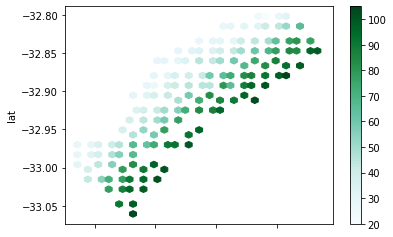

In [9]:
df.plot.hexbin(x='lon',y='lat',C='depth',gridsize=35)

<AxesSubplot:xlabel='e_utm56s', ylabel='n_utm56s'>

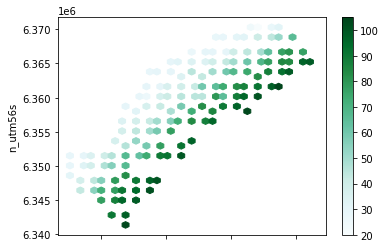

In [10]:
df.plot.hexbin(x='e_utm56s',y='n_utm56s',C='depth',gridsize=35)

count    150.000000
mean      60.193333
std       25.257253
min       20.000000
25%       37.250000
50%       56.000000
75%       83.750000
max      105.000000
Name: depth, dtype: float64
(28.5, 37.0]                  32
(37.0, 45.5]                  24
(96.5, 105.0]                 16
(71.0, 79.5]                  14
(79.5, 88.0]                  14
(88.0, 96.5]                  14
(45.5, 54.0]                  11
(54.0, 62.5]                  10
(62.5, 71.0]                   9
(19.913999999999998, 28.5]     6
Name: depth, dtype: int64


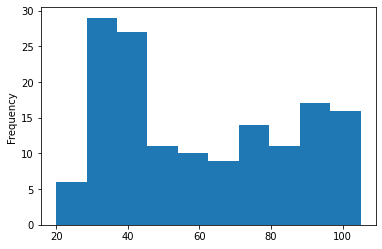

In [11]:
print(df['depth'].describe())
depth_bin10 = df['depth'].value_counts(bins=10)
print(depth_bin10)
df['depth'].plot.hist(bins=10);

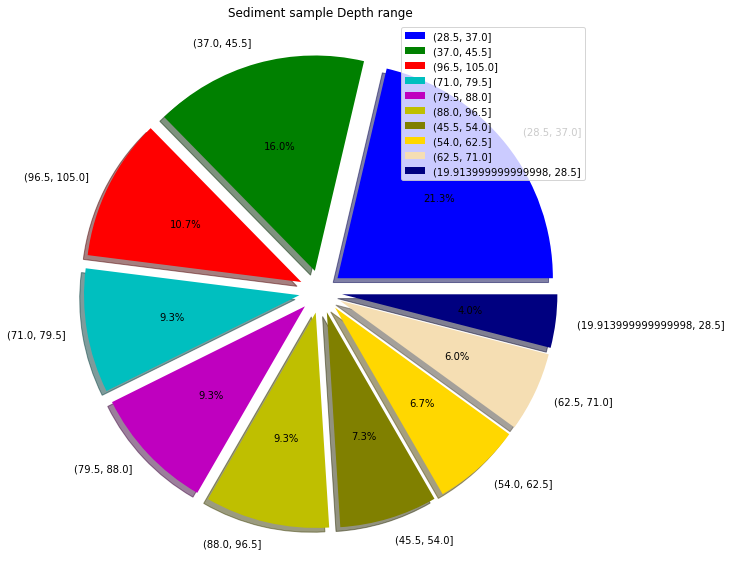

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (10,8)) 
colors = ['b','g','r','c','m','y','olive','gold','wheat','navy'] #we know that there are 4 types
labels = list(depth_bin10.index)
values_fraction = np.round(depth_bin10.values*100/150,2)
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ax1.pie(values_fraction,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('Sediment sample Depth range')
ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()

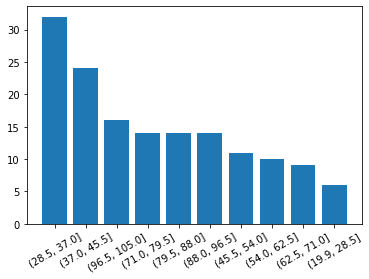

In [13]:
labels_str = [str(i) for i in labels]
labels_str[-1] = '(19.9, 28.5]'
plt.bar(labels_str,depth_bin10.values)
plt.xticks(rotation=30)
plt.show()

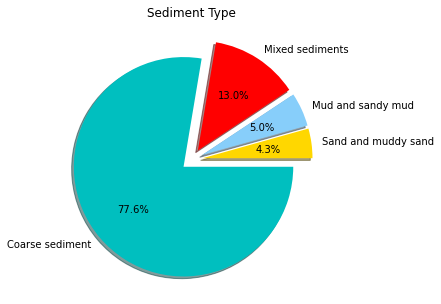

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (6,6)) 
x = df['class'].value_counts(normalize=True,ascending=True)
colors = ['gold','lightskyblue','r','c'] #we know that there are 4 types
labels = list(x.index)
values = np.round(x.values*100,2)
explode = (0.1,0.1,0.1,0.1)
ax1.pie(values,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('Sediment Type')
# ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

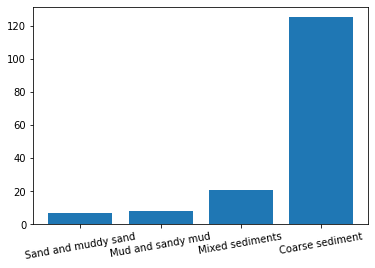

In [15]:
A_unique = df['class'].unique()
B = df['class'].value_counts(ascending=True)
B_index_lst = list(B.index)
B_value_lst = list(B.values)
plt.bar(B_index_lst,B_value_lst)
plt.xticks(rotation=10)

#### 1d Convert to spatially enable dataframe - spatial pandas
20210226_Not working when exporting to shp file


In [16]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [17]:
sdf = pd.DataFrame.spatial.from_xy(df=df,
                                    x_column='lon',
                                    y_column='lat',
                                    sr=4326)
sdf.iloc[[0,50,100,-1]]

,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,name,...,file_name,sample_held,obs_sig,anoxic_sediments,comments,sample,url,e_utm56s,n_utm56s,SHAPE
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,NaN,90,-,20210104_077,...,20210104_077_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.239074,6.358397e+06,"{""spatialReference"": {""wkid"": 4326}, ""x"": 151...."
50,67,5/01/2021,01:02,-32.892604,151.918325,37.0,NaN,80,NaN,20210105_67,...,20210105_67_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,398829.668740,6.360100e+06,"{""spatialReference"": {""wkid"": 4326}, ""x"": 151...."
100,96,9/01/2021,09:20,-32.923830,151.990723,88.0,NaN,80,NaN,20210109_096,...,20210109_096_2,N,BT,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,405634.567701,6.356705e+06,"{""spatialReference"": {""wkid"": 4326}, ""x"": 151...."
160,160,10/01/2021,17:04,-33.060768,151.861614,104.0,NaN,90,NaN,20210110_160,...,20210110_160_2,N,NS,NaN,NaN,NaN,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.792168,6.341400e+06,"{""spatialReference"": {""wkid"": 4326}, ""x"": 151...."


In [18]:
df.loc[10:19][['sample_id', 'date_utc', 'depth', 'file_name', 'class']]

,sample_id,date_utc,depth,file_name,class
10,25,4/01/2021,32.0,20210104_025_2,Coarse sediment
11,26,4/01/2021,34.0,20210104_026_2,Coarse sediment
12,27,4/01/2021,34.0,20210104_027_2,Coarse sediment
13,13,4/01/2021,27.0,20210104_013_2,Coarse sediment
14,14,4/01/2021,30.0,20210104_014_2,Coarse sediment
15,15,4/01/2021,30.0,20210104_015_2,Coarse sediment
16,16,4/01/2021,30.0,20210104_016_2,Coarse sediment
17,5,4/01/2021,28.0,20210104_05_2,Sand and muddy sand
18,6,4/01/2021,29.0,20210104_06_2,Mixed sediments
19,7,4/01/2021,31.0,20210104_07_2,Coarse sediment


##### Project from WGS84 to UTM56S

In [19]:
sdf.SHAPE.head()

0    {"spatialReference": {"wkid": 4326}, "x": 151....
1    {"spatialReference": {"wkid": 4326}, "x": 151....
2    {"spatialReference": {"wkid": 4326}, "x": 151....
3    {"spatialReference": {"wkid": 4326}, "x": 151....
4    {"spatialReference": {"wkid": 4326}, "x": 151....
Name: SHAPE, dtype: geometry

In [20]:
sdf.spatial.sr

{'wkid': 4326}

In [21]:
#project to 32756 UTM56S
sdf.spatial.project(32756)
sdf.spatial.sr

{'wkid': 32756, 'latestWkid': 32756}

In [22]:
sdf.spatial.full_extent

(385219.55732350814, 6341400.26318385, 422623.8956221083, 6370298.282672904)

#### 1e visual check with spatial df

In [23]:
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile',verify_cert=False)
m_class = GIS().map(zoomlevel=10.5)
m_class.center=[sdf.lat.mean(),sdf.lon.mean()]
m_class.legend = True
m_class


Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [28]:
sdf.spatial.plot(map_widget=m_class,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

True

#### 1e export 2 shp file - not work

In [ ]:
out_shp = r'E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers\SI1001SamplesUTM56Ssdf2shp.shp'
sdf.spatial.to_featureclass(out_shp)

In [ ]:
os.listdir('E:\\HIPP\\11_Deliverables\\03_Bathymetry\\08_SeabedTexture_And_AncillaryLayers')

In [ ]:
#read in again to check
sdf2 = pd.DataFrame.spatial.from_featureclass(out_shp)
sdf2.iloc[[0,50,100,-1]]

In [ ]:
m2 = GIS().map(zoomlevel=10.5)
m2.center=[sdf2.lat.mean(),sdf.lon.mean()]
m2.legend = True
m2

In [ ]:
sdf2.spatial.plot(map_widget=m2,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

#### Export to csv - using normal pandas

In [42]:
#use pandas with no index
# df = df.drop(['SHAPE'])
out_csv = r'E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers\SI1001_Samples.csv'
df.to_csv(out_csv,index=False)
df

,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,name,...,file_name,sample_held,obs_sig,anoxic_sediments,comments,sample,url,e_utm56s,n_utm56s,SHAPE
0,77,4/01/2021,00:52,-32.907482,151.863574,30.0,0.0,90,-,20210104_077,...,20210104_077_2,N,BT,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.239074,6.358397e+06,"{""x"": 393726.23907391087, ""y"": 6358396.8790635..."
1,78,4/01/2021,01:27,-32.907612,151.881709,31.0,0.0,90,NaN,20210104_078,...,20210104_078_2,N,BT,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,395422.468960,6.358401e+06,"{""x"": 395422.468960232, ""y"": 6358400.674685201..."
2,65,4/01/2021,01:51,-32.892214,151.882094,29.0,0.0,90,NaN,20210104_065,...,20210104_065_2,N,BT,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,395440.324171,6.360108e+06,"{""x"": 395440.32417072885, ""y"": 6360108.1554503..."
3,66,4/01/2021,02:13,-32.892475,151.900388,26.0,0.0,80,NaN,20210104_066,...,20210104_066_2,N,BT,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,397151.824079,6.360097e+06,"{""x"": 397151.82407888974, ""y"": 6360097.1934747..."
4,52,4/01/2021,02:24,-32.877213,151.900391,30.0,0.0,80,NaN,20210104_052,...,20210104_052_2,N,BT,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,397134.423067,6.361789e+06,"{""x"": 397134.4230672068, ""y"": 6361789.26253209..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,155,10/01/2021,15:25,-33.029942,151.843741,88.0,0.0,90,NaN,20210110_155,...,20210110_155_2,N,NS,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,392020.582771,6.344800e+06,"{""x"": 392020.5827712227, ""y"": 6344799.78984059..."
157,154,10/01/2021,15:47,-33.029774,151.825591,78.0,0.0,90,NaN,20210110_154,...,20210110_154_2,N,NS,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,390325.344108,6.344800e+06,"{""x"": 390325.34410816996, ""y"": 6344799.6229349..."
158,158,10/01/2021,16:11,-33.045279,151.843580,91.0,0.0,90,NaN,20210110_158,...,20210110_158_2,N,NS,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,392024.307756,6.343099e+06,"{""x"": 392024.3077561088, ""y"": 6343099.12642756..."
159,159,10/01/2021,16:39,-33.045444,151.861780,98.0,0.0,90,NaN,20210110_159,...,20210110_159_2,N,NS,0.0,NaN,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393723.944475,6.343099e+06,"{""x"": 393723.944475151, ""y"": 6343099.382272849..."


### Step 2: using XYTableToPoint to convert csv file into ESRI shp format

In [48]:
import arcpy
arcpy.env.overwriteOutput = True
#csv2shp_UTM56S
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers"
in_table = r"SI1001_Samples.csv"
in_table = out_csv
out_feature_class = "SI1001_Samples_UTM56S_SSDM.shp"
x_coords = "e_utm56s"
y_coords = "n_utm56s"
z_coords = None
sr_wgs84 = arcpy.SpatialReference(32756) #CRS: UTM56S 32756
try: arcpy.management.XYTableToPoint(in_table, out_feature_class,
                                x_coords, y_coords, z_coords,
                                sr_wgs84)
except Exception as e: print(e)

# Print the total rows
print(arcpy.GetCount_management(out_feature_class))

161


In [49]:
#readin using sdf to test the table and geometry
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers"
sdf_test = pd.DataFrame.spatial.from_featureclass(out_feature_class)


from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile',verify_cert=False)
m2 = GIS().map(zoomlevel=10.5)
m2.center=[sdf_test.lat.mean(),sdf_test.lon.mean()]
m2.legend = True
m2


Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [50]:
sdf_test.spatial.plot(map_widget=m2,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple',
                 linewidth=0
                )
sdf_test.iloc[[0,-1,50,100]]

,FID,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,...,sample_hel,obs_sig,anoxic_sed,comments,sample,url,e_utm56s,n_utm56s,SHAPE_1,SHAPE
0,0,77,2021-01-04,00:52,-32.907482,151.863574,30.0,0.0,90,-,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.239074,6.358397e+06,"{'x': 393726.23907391087, 'y': 6358396.8790635...","{""x"": 393726.2390999999, ""y"": 6358396.8791, ""s..."
160,160,160,2021-01-10,17:04,-33.060768,151.861614,104.0,0.0,90,,...,N,NS,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.792168,6.341400e+06,"{'x': 393726.79216775665, 'y': 6341400.2631838...","{""x"": 393726.7922, ""y"": 6341400.2632, ""spatial..."
50,50,67,2021-01-05,01:02,-32.892604,151.918325,37.0,0.0,80,,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,398829.668740,6.360100e+06,"{'x': 398829.6687401531, 'y': 6360100.23686837...","{""x"": 398829.6687000003, ""y"": 6360100.2369, ""s..."
100,100,96,2021-01-09,09:20,-32.923830,151.990723,88.0,0.0,80,,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,405634.567701,6.356705e+06,"{'x': 405634.567701295, 'y': 6356705.449867805...","{""x"": 405634.56769999955, ""y"": 6356705.4499, ""..."


In [51]:
#csv2shp_WGS84
# arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw"
in_table = r"SI1001_Samples.csv"
in_table = out_csv
out_feature_class = "SI1001_Samples_WGS84_SSDM.shp"
x_coords = "lon"
y_coords = "lat"
z_coords = None
sr_wgs84 = arcpy.SpatialReference(4326) #CRS: WGS84 4326
arcpy.management.XYTableToPoint(in_table, out_feature_class,
                                x_coords, y_coords, z_coords,
                                sr_wgs84)
# Print the total rows
print(arcpy.GetCount_management(out_feature_class))


161


In [52]:
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers"
sdf_test2 = pd.DataFrame.spatial.from_featureclass(out_feature_class)


from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile',verify_cert=False)
m3 = GIS().map(zoomlevel=10.5)
m3.center=[sdf_test2.lat.mean(),sdf_test.lon.mean()]
m3.legend = True
m3


Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [53]:
sdf_test2.spatial.plot(map_widget=m3,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple',
                 linewidth=0
                )
sdf_test2.iloc[[0,-1,50,100]]

,FID,sample_id,date_utc,time_utc,lat,lon,depth,method,recovery,weight,...,sample_hel,obs_sig,anoxic_sed,comments,sample,url,e_utm56s,n_utm56s,SHAPE_1,SHAPE
0,0,77,2021-01-04,00:52,-32.907482,151.863574,30.0,0.0,90,-,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.239074,6.358397e+06,"{'x': 393726.23907391087, 'y': 6358396.8790635...","{""x"": 151.86357354200004, ""y"": -32.90748219999..."
160,160,160,2021-01-10,17:04,-33.060768,151.861614,104.0,0.0,90,,...,N,NS,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,393726.792168,6.341400e+06,"{'x': 393726.79216775665, 'y': 6341400.2631838...","{""x"": 151.86161360000006, ""y"": -33.06076823999..."
50,50,67,2021-01-05,01:02,-32.892604,151.918325,37.0,0.0,80,,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,398829.668740,6.360100e+06,"{'x': 398829.6687401531, 'y': 6360100.23686837...","{""x"": 151.9183246350001, ""y"": -32.892603899999..."
100,100,96,2021-01-09,09:20,-32.923830,151.990723,88.0,0.0,80,,...,N,BT,0.0,,0.0,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,405634.567701,6.356705e+06,"{'x': 405634.567701295, 'y': 6356705.449867805...","{""x"": 151.99072260000003, ""y"": -32.92382998999..."


### Step 3: Define field name and attribute values and use CalculateField to update field values

In [54]:
#testing readin again and display the data from SSDM geodatabase using spatial enable dataframe

In [68]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
gis = GIS(username="adelmomancini", password="Geomatics123!")
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry

arcpy.env.workspace = r"E:\HIPP\11_Deliverables\SSDM\GIS\FGDB\HIPP_SI1001_UTM56S.gdb"
input_ft = r'Environmental_Samples\Environmental_Sample_Pnt'
sdf_test2 = pd.DataFrame.spatial.from_featureclass(input_ft)

gis = GIS(profile='your_online_profile',verify_cert=False)
m4 = GIS().map(zoomlevel=10.5)
m4.center=[-32.911,151.960]
m4.legend = True
m4



Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [108]:
sdf_test2.spatial.plot(map_widget=m4,
                 col='SAMPLE_DESC',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
#                  linewidth=1
                )
sdf_test2.iloc[[0,-1,50,100]]

,OBJECTID,LAST_UPDATE,LAST_UPDATE_BY,FEATURE_ID,SURVEY_ID,SURVEY_ID_REF,REMARKS,SAMPLE_NAME,SAMPLE_DESC,SAMPLING_METHOD,SAMPLING_DATE,DATA_URL,REPORT_URL,PENETRATION,RECOVERY,APPROVED_DATE,SAMPLE_NUMBER,SAMPLING_EQUIPMENT,SHAPE
0,586,2021-02-22,XL,{6C1E04B0-4ED2-485E-AF4B-ECAED21CF158},1001,BN7875559,,20210104_077,Coarse sediment,IOGP1045 Soil/Sediment Sample,2021-01-04,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,77,Van Veen Grab Sampling,"{""x"": 393726.23910000006, ""y"": 6358396.8791000..."
160,746,2021-02-22,XL,{27B88781-75AD-4AC8-8B94-9157576C14EA},1001,BN7875559,,20210110_160,Coarse sediment,IOGP1045 Soil/Sediment Sample,2021-01-10,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,160,Van Veen Grab Sampling,"{""x"": 393726.7922, ""y"": 6341400.263200001, ""z""..."
50,636,2021-02-22,XL,{E7A5D1A6-BD7A-473B-8F7C-E73DD53EF3E2},1001,BN7875559,,20210105_67,Mixed sediments,IOGP1045 Soil/Sediment Sample,2021-01-05,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,67,Van Veen Grab Sampling,"{""x"": 398829.66870000004, ""y"": 6360100.2369000..."
100,686,2021-02-22,XL,{1D73DCB5-6933-4B82-9DCF-17A898BE7825},1001,BN7875559,,20210109_096,Mud and sandy mud,IOGP1045 Soil/Sediment Sample,2021-01-09,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,96,Van Veen Grab Sampling,"{""x"": 405634.5677000001, ""y"": 6356705.4499, ""z..."


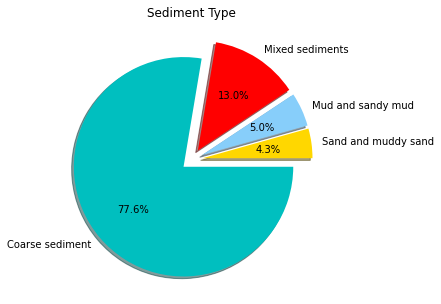

In [109]:
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (6,6)) 
x = sdf_test2['SAMPLE_DESC'].value_counts(normalize=True,ascending=True)
colors = ['gold','lightskyblue','r','c'] #we know that there are 4 types
labels = list(x.index)
values = np.round(x.values*100,2)
explode = (0.1,0.1,0.1,0.1)
ax1.pie(values,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('Sediment Type')
# ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()